In [1]:
import pandas as pd
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers 
import PIL.Image as Image
%matplotlib inline

In [2]:
Animaldir = "raw-img" #Image local directories
Test_Animal_dir = 'raw2-img'

In [3]:
batch_size = 32 #Imports image from local directory at our prefered size
img_height = 192
img_width = 192
img_size = (192,192)

train_animals = tf.keras.utils.image_dataset_from_directory(
  Animaldir,
  validation_split=0.2,
  label_mode='int',
  labels = 'inferred',
  class_names = None,
  color_mode = 'rgb',
  subset="training",
  shuffle = True,
  seed = 123,
  image_size=img_size,
  batch_size=batch_size)

val_animals = tf.keras.utils.image_dataset_from_directory(
  Animaldir,
  validation_split=0.2,
  label_mode='int',
  labels = 'inferred',
  class_names = None,
  color_mode = 'rgb',
  shuffle = True,
  seed = 123,
  subset="validation",
  image_size=img_size,
  batch_size=batch_size)


Found 18686 files belonging to 10 classes.
Using 14949 files for training.
Found 18686 files belonging to 10 classes.
Using 3737 files for validation.


In [4]:
class_names = np.array(train_animals.class_names) #Gets the array of class names
num_classes = len(class_names)

In [5]:
data_augmentation = keras.Sequential( #Data Augmentation 1
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
  ]
)

In [6]:
model_3 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), #I suggest not running this as will take well over 20 minutes
  layers.Conv2D(16, 3, padding='same', activation='relu'), #If you are running this on collab I don't think it will even run
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'), #This adds a layer of dropout at the end of the NN
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 192, 192, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 192, 192, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 96, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)       

In [7]:
results_3 = model_3.fit(train_animals, #Up to 30 minutes of runtime or more
                    epochs=10,
                    validation_data=val_animals)

Epoch 1/10
468/468 [==============================] - 136s 290ms/step - loss: 1.9095 - accuracy: 0.3222 - val_loss: 1.6712 - val_accuracy: 0.4215
Epoch 2/10
468/468 [==============================] - 137s 292ms/step - loss: 1.3686 - accuracy: 0.5302 - val_loss: 1.4456 - val_accuracy: 0.5052
Epoch 3/10
468/468 [==============================] - 137s 293ms/step - loss: 1.0589 - accuracy: 0.6410 - val_loss: 1.3930 - val_accuracy: 0.5579
Epoch 4/10
468/468 [==============================] - 137s 293ms/step - loss: 0.7518 - accuracy: 0.7444 - val_loss: 1.5287 - val_accuracy: 0.5438
Epoch 5/10
468/468 [==============================] - 137s 293ms/step - loss: 0.4940 - accuracy: 0.8347 - val_loss: 1.7059 - val_accuracy: 0.5563
Epoch 6/10
468/468 [==============================] - 137s 293ms/step - loss: 0.3326 - accuracy: 0.8879 - val_loss: 2.1151 - val_accuracy: 0.5472
Epoch 7/10
468/468 [==============================] - 137s 293ms/step - loss: 0.2389 - accuracy: 0.9196 - val_loss: 2.2260 -

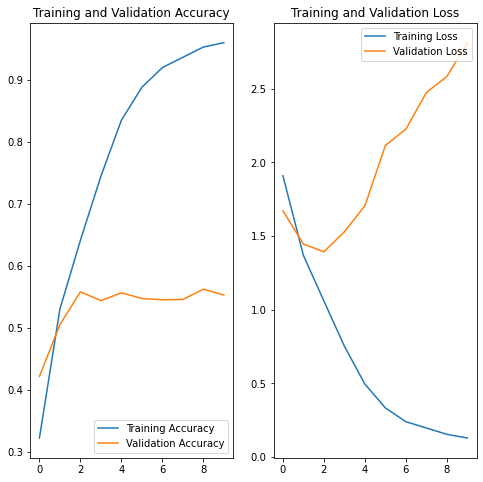

In [8]:
acc = results_3.history['accuracy'] #Plots performance
val_acc = results_3.history['val_accuracy']

loss = results_3.history['loss']
val_loss = results_3.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()